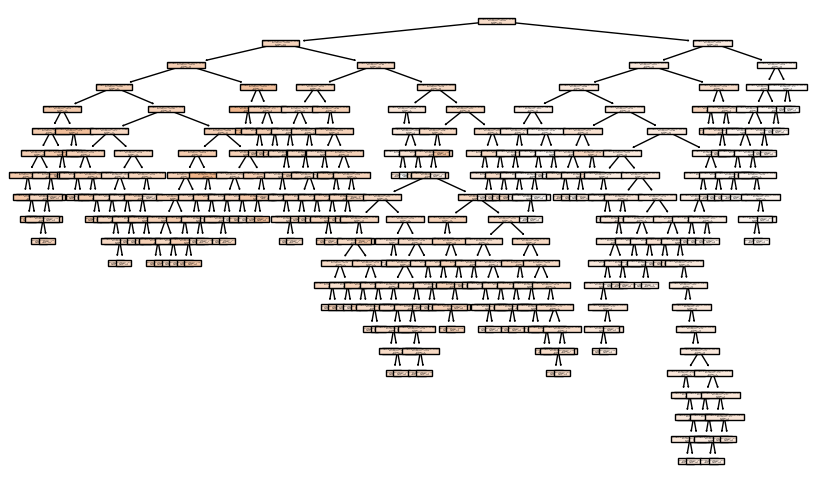

Predicted Y house price of unit area: 40.6


C:\Users\hency\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [2]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

# Load the data
data = pd.read_csv('Real estate - Real estate.csv')

# Drop unnecessary columns and remove rows with missing values
df = data.drop(["No", "X1 transaction date", "X5 latitude", "X6 longitude"], axis=1).dropna()

# Remove duplicate rows
df = df.drop_duplicates()

# Split the data into input features (X) and target variable (Y)
X = df[['X3 distance to the nearest MRT station']]
Y = df['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Create and fit the DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, Y_train)

# Plot the decision tree (optional)
plt.figure(figsize=(10, 6))
tree.plot_tree(regressor, filled=True, feature_names=['X3 distance to the nearest MRT station'])
plt.show()

# Export the decision tree to a DOT file (optional)
from sklearn.tree import export_graphviz
export_graphviz(regressor, out_file='tree.dot', feature_names=['X3 distance to the nearest MRT station'])

# Make predictions
y_pred = regressor.predict([[390]])
print("Predicted Y house price of unit area:", y_pred[0])